Sequential API does not allow share layers or multiple input/output layers

Functional API can be used to contruct complex models

In [1]:
import platform
import tensorflow as tf
import keras

print('Platform: {}'.format(platform.platform()))
print('Tensorflow version: {}'.format(tf.__version__))
print('Keras version: {}'.format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image
import warnings

warnings.filterwarnings('ignore')

Platform: Linux-4.4.0-159-generic-x86_64-with-debian-stretch-sid
Tensorflow version: 1.14.0
Keras version: 2.2.5


Using TensorFlow backend.


# Keras Sequential Models

In [2]:
from keras.models import Sequential
from keras.layers import Dense

# Dense(units, ...)
model = Sequential([Dense(2, input_shape=(1, )), Dense(1)])

W0904 22:08:38.644260 139977022412544 deprecation_wrapper.py:119] From /hpc/home/ephyan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 22:08:38.659642 139977022412544 deprecation_wrapper.py:119] From /hpc/home/ephyan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 22:08:38.662448 139977022412544 deprecation_wrapper.py:119] From /hpc/home/ephyan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [3]:
model = Sequential()
model.add(Dense(2, input_shape=(1, 1)))
model.add(Dense(1))

# Keras Functional Models

- Allow user to define ad-hoc and acyclic compute graph
- The model is created by :
   1. Connect layer instances 
   2. Assign input and output layers

In [4]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

mnist_input = Input(shape=(784, ))
hidden = Dense(512)(mnist_input)

model = Model(inputs=mnist_input, outputs=hidden)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 541,794
Trainable params: 541,794
Non-trainable params: 0
_________________________________________________________________


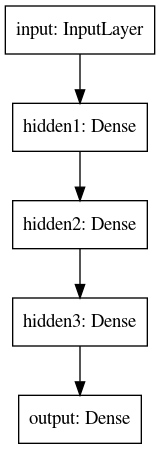

In [5]:
# MLP
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

mnist_input = Input(shape=(784, ), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(mnist_input)
hidden2 = Dense(216, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
output = Dense(10, activation='softmax', name='output')(hidden3)

model = Model(inputs=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='multilayer_perceptron_graph.png')

Image('multilayer_perceptron_graph.png')

# CNN

W0904 22:08:38.951754 139977022412544 deprecation_wrapper.py:119] From /hpc/home/ephyan/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output (Dense)               (None, 4, 4, 10)          650 

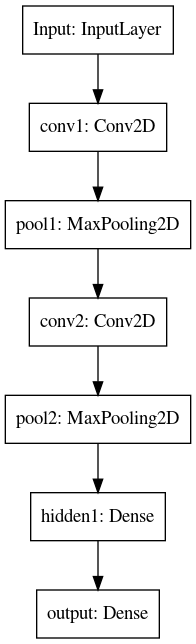

In [6]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import plot_model

mnist_input = Input(shape=(28, 28, 1), name='Input')

# Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', ...)
conv1 = Conv2D(128, kernel_size=4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)

conv2 = Conv2D(64, kernel_size=4, activation='relu', name='conv2')(pool1)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)

hidden1 = Dense(64, activation='relu', name='hidden1')(pool2)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(input=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='CNN.png')

Image('CNN.png')

# RNN

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784, 1)            0         
_________________________________________________________________
lstm1 (LSTM)                 (None, 128)               66560     
_________________________________________________________________
hidden1 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 75,466
Trainable params: 75,466
Non-trainable params: 0
_________________________________________________________________


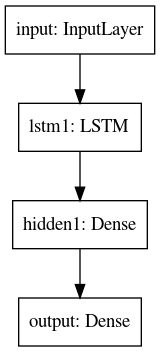

In [7]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input')
lstm1 = LSTM(128, name='lstm1')(mnist_input)
hidden1 = Dense(64, activation='relu', name='hidden1')(lstm1)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(input=mnist_input, outputs=output)

model.summary()

plot_model(model, 'RNN.png')

Image('RNN.png')

# Shared Input Layer

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 21, 21, 16)   1040        input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
____________________________________________________________________________________________

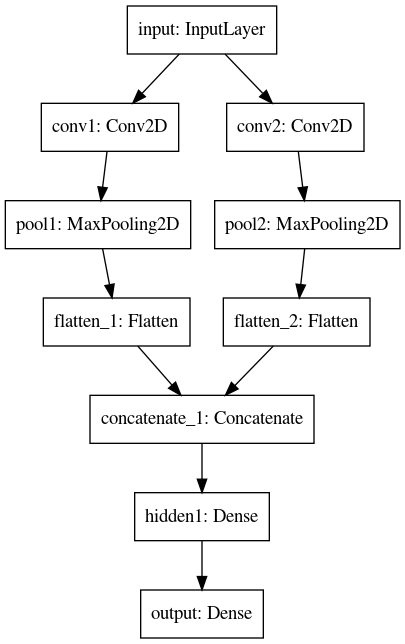

In [8]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model

mnist_input = Input(shape=(28, 28, 1), name='input')

# The first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu', name='conv1')(mnist_input)
pool1 = MaxPool2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = Flatten()(pool1)

# The second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu', name='conv2')(mnist_input)
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)

# Merge the two extractor
merge = concatenate([flat1, flat2])

hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
output = Dense(10, activation='softmax', name='output')(hidden1)
model = Model(input=mnist_input, outputs=output)

model.summary()

plot_model(model, to_file='shared_input_layer.png')

Image('shared_input_layer.png')

# Shared Feature Extraction Layer

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
lstm1 (LSTM)                    (None, 128)          66560       input[0][0]                      
__________________________________________________________________________________________________
interp21 (Dense)                (None, 64)           8256        lstm1[0][0]                      
__________________________________________________________________________________________________
interp22 (Dense)                (None, 32)           2080        interp21[0][0]                   
____________________________________________________________________________________________

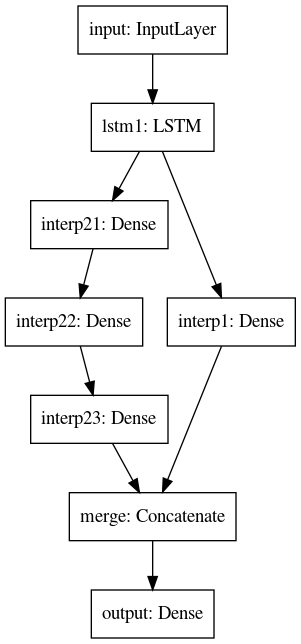

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
from keras.utils import plot_model

mnist_input = Input(shape=(784, 1), name='input')
lstm1 = LSTM(128, name='lstm1')(mnist_input)
interp1 = Dense(10, activation='relu', name='interp1')(lstm1)
interp21 = Dense(64, activation='relu', name='interp21')(lstm1)
interp22 = Dense(32, activation='relu', name='interp22')(interp21)
interp23 = Dense(16, activation='relu', name='interp23')(interp22)
merge = concatenate([interp1, interp23], name='merge')
output = Dense(10, activation='softmax', name='output')(merge)

model = Model(input=mnist_input, outputs=output)

model.summary()
plot_model(model, to_file='shared_feature_extractor.png')
Image('shared_feature_extractor.png')

# Multiple Ouputs Model

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_gray_bigsize (InputLayer)   (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
img_rgb_smallsize (InputLayer)  (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         img_gray_bigsize[0][0]           
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 29, 29, 32)   1568        img_rgb_smallsize[0][0]          
____________________________________________________________________________________________

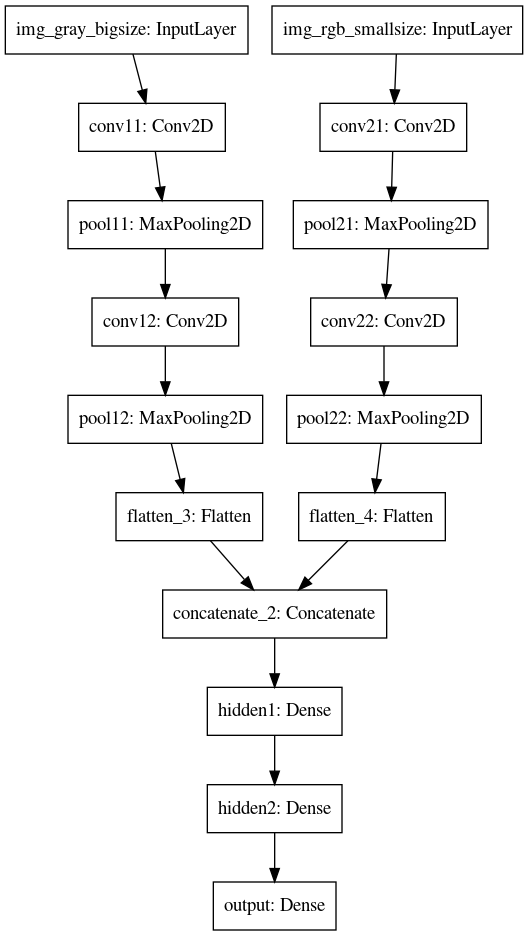

In [10]:
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers import Input, Dense, Flatten
from keras.layers.merge import concatenate
from keras.utils import plot_model

# The first input layer
img_gray_bigsize = Input(shape=(64, 64, 1), name='img_gray_bigsize')
conv11 = Conv2D(32, kernel_size=4, activation='relu', name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2, 2), name='pool11')(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu', name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2, 2), name='pool12')(conv12)
flat1 = Flatten()(pool12)

# The second input layer
img_rgb_smallsize = Input(shape=(32, 32, 3), name='img_rgb_smallsize')
conv21 = Conv2D(32, kernel_size=4, activation='relu', name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2, 2), name='pool21')(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu', name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2, 2), name='pool22')(conv22)
flat2 = Flatten()(pool22)

# merge
merge = concatenate([flat1, flat2])

# User two hidden dense layer to interpret the features
hidden1 = Dense(128, activation='relu', name='hidden1')(merge)
hidden2 = Dense(64, activation='relu', name='hidden2')(hidden1)

# Output layer
output = Dense(10, activation='softmax', name='output')(hidden2)

model = Model(inputs=[img_gray_bigsize, img_rgb_smallsize], outputs=output)

model.summary()
plot_model(model, to_file='multiple_inputs.png')
Image('multiple_inputs.png')